This example investigates the effect of flight altitudes for a drone investigation.

In [17]:
import numpy as np
from saem import CSEMData

In [18]:
fMin, fMax = 32, 25000
f = np.round(2**np.arange(0, np.log2(fMax/fMin), 0.5) * fMin)
f = np.hstack((f[3], f[5:-3], f[-2:]))
print(f)

[   91.   181.   256.   362.   512.   724.  1024.  1448.  2048.  2896.
  4096.  5793.  8192. 16384. 23170.]


CSEM data with 20 stations and 15 frequencies
Transmitter length 500m
Median Rx distance 50.0m
Sounding pos at 25.000000,0.000000,10.000000,
None


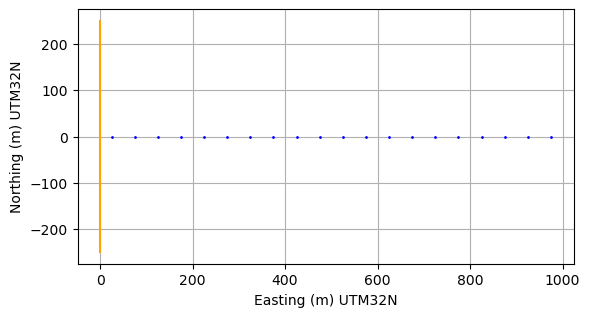

In [19]:
x = np.arange(25, 1000, 50)  # receiver positions
txLen = 500  # length of the transmitter
csem10 = CSEMData(f=f, rx=x, rz=10, tx=[0, 0], ty=[-txLen/2, txLen/2])
csem10.cmp = [1, 0, 1]
print(csem10)
ax = csem10.showPos()

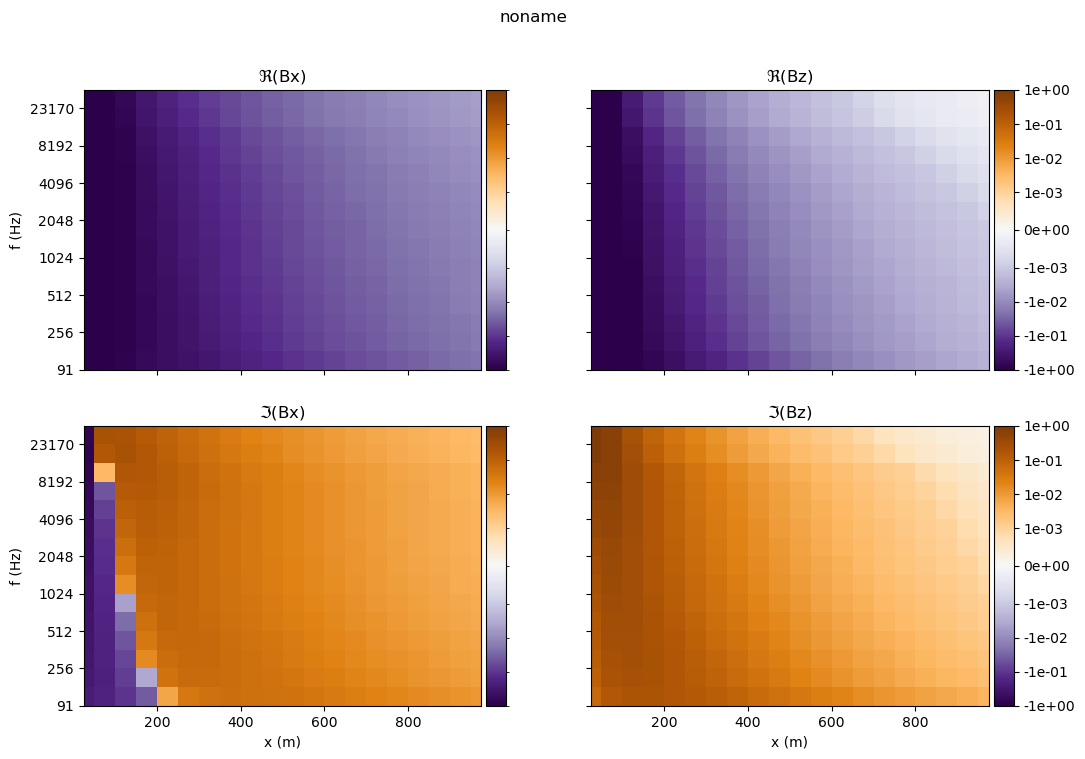

In [20]:
model = dict(rho=[300, 20, 300, 5], thk=[20, 10, 20])
csem10.simulate(**model)
csem10.DATA = csem10.RESP
csem10.showLineData();

In [21]:
csem40 = CSEMData(f=f, rx=x, tx=[0, 0], ty=[-txLen/2, txLen/2], rz=40)
csem40.cmp = [1, 0, 1]
csem40.simulate(**model)
csem40.DATA = csem40.RESP

closest point at distance is  0.0
Tx distance  525.0
closest point at distance is  0.0
Tx distance  525.0


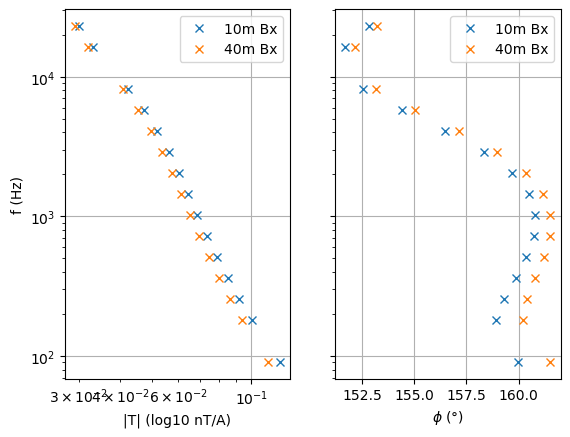

In [22]:
pos = [525, 0]
ax = csem10.showSounding(position=pos, color="C0", cmp=[1, 0, 0], baselabel="10m")
csem40.showSounding(pos, ax=ax, color="C1", cmp=[1, 0, 0], baselabel="40m");

closest point at distance is  0.0
Tx distance  525.0
closest point at distance is  0.0
Tx distance  525.0


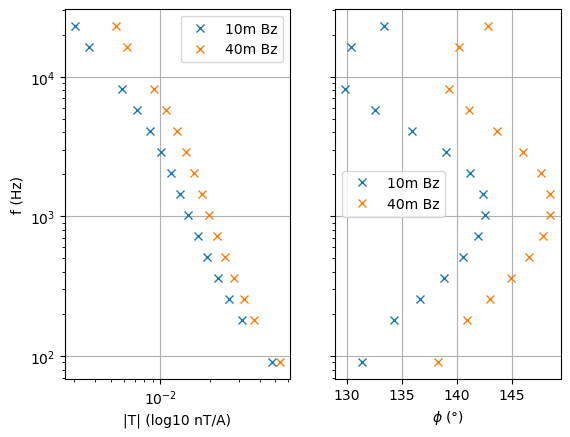

In [23]:
pos = [525, 0]
ax = csem10.showSounding(position=pos, color="C0", cmp=[0, 0, 1], baselabel="10m")
csem40.showSounding(pos, ax=ax, color="C1", cmp=[0, 0, 1], baselabel="40m");

In [24]:
csem10.createDepthVector()
csem10.depth *= 0.5
csem40.createDepthVector()
csem40.depth *= 0.5

12/07/23 - 18:49:53 - pyGIMLi - INFO - Starting inversion.


fop: <saem.modelling.fopSAEM object at 0x000001E8B2279A90>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001E8B2BD91C0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001E8B2279C20>
min/max (data): -0.11/0.04
min/max (error): 0.19%/4.91%
min/max (start model): 4.39/253
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 7.48 (dPhi = 48.1%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 2.65 (dPhi = 49.41%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.32 (dPhi = 42.86%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.32)                   #
#####################################################

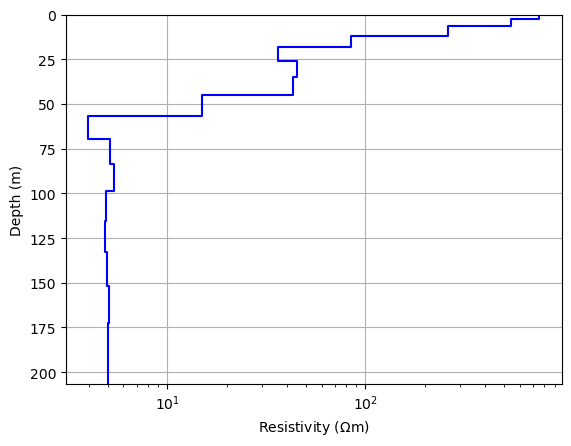

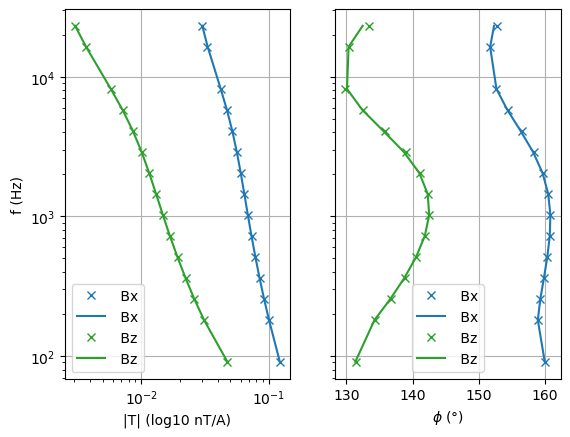

In [33]:
model10 = csem10.invertSounding(relError=0.001, absError=0.0001, show=True, verbose=True)

12/07/23 - 18:50:29 - pyGIMLi - INFO - Starting inversion.


fop: <saem.modelling.fopSAEM object at 0x000001E8B24D9DB0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001E8B23C4F40>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001E8B24D9C70>
min/max (data): -0.11/0.04
min/max (error): 0.19%/3.16%
min/max (start model): 2.83/201
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 20.73 (dPhi = 89.12%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 1.01 (dPhi = 85.61%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 0.33 (dPhi = 24.65%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.33)                   #
###################################################

array([[754.2644772 , 652.34151098],
       [545.01518577, 494.12354696],
       [260.22081955, 259.72467874],
       [ 84.10230725,  89.52115651],
       [ 36.12800241,  36.06321149],
       [ 45.14288652,  44.67468033],
       [ 43.0537775 ,  41.56567311],
       [ 14.98846618,  15.43724881],
       [  3.99734961,   3.98857694],
       [  5.12282094,   5.11922767],
       [  5.399826  ,   5.41304349],
       [  4.92638465,   4.93848989],
       [  4.81995081,   4.8123816 ],
       [  4.97468851,   4.96470559],
       [  5.08284251,   5.07412436],
       [  5.01201258,   5.01355875]])

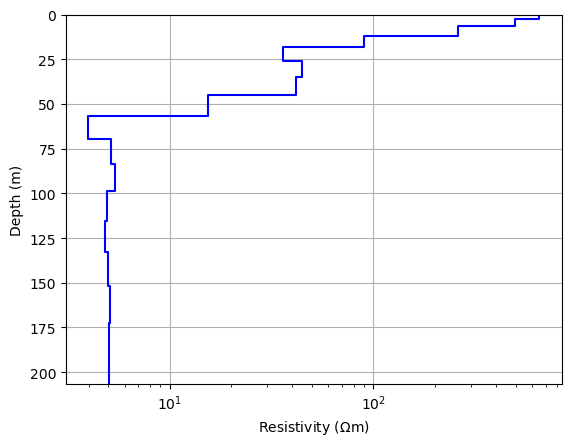

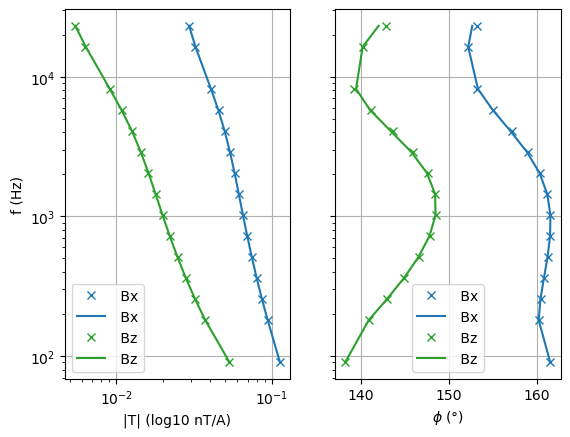

In [34]:
model40 = csem40.invertSounding(relError=0.001, absError=0.0001, show=True, verbose=True)
np.column_stack([model10, model40])

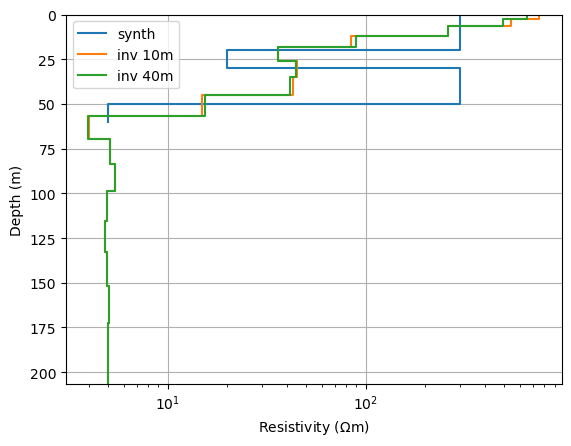

In [36]:
import matplotlib.pyplot as plt
from pygimli.viewer.mpl import drawModel1D
fig, ax = plt.subplots()
drawModel1D(ax, model["thk"], model["rho"], color="C0", plot='semilogx', label="synth")
drawModel1D(ax, np.diff(csem10.depth), csem10.model, color="C1", plot='semilogx', label="inv 10m")
drawModel1D(ax, np.diff(csem10.depth), csem40.model, color="C2", plot='semilogx', label="inv 40m")
ax.legend()